In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset into python environment

In [3]:
df=pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking details of the dataset
df.shape

(150, 5)

In [5]:
df.columns


Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#finding missing values
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

C:\Users\vaisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classification', ylabel='count'>

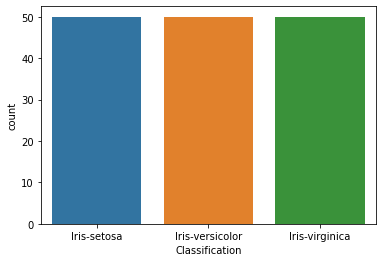

In [9]:
sns.countplot(df['Classification'])

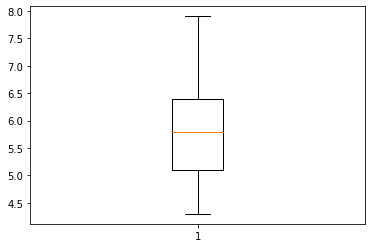

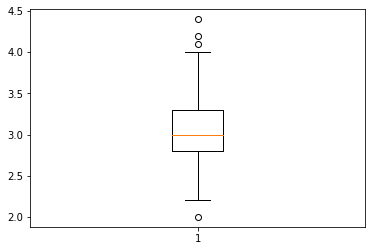

In [10]:
#preprocessing
#Checking for Outliers
plt.figure(1)
plt.boxplot([df['SL']])
plt.figure(2)
plt.boxplot([df['SW']])
plt.show()

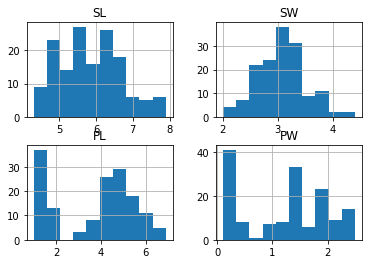

In [11]:
df.hist()
plt.show()

In [26]:
#splitting the dataset
X=df['SL'].values.reshape(-1,1)
Y=df['SW'].values.reshape(-1,1)
#onehot encoding
df=pd.get_dummies(df)
df.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [13]:
df.shape

(150, 7)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
train,test=train_test_split(df,random_state=42,test_size=0.2)
train.shape

(120, 7)

In [15]:
test.shape

(30, 7)

In [16]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [29]:
train_X=train[['SL', 'SW', 'PL', 'PW']]

test_X=train[['SL', 'SW', 'PL', 'PW']]


In [24]:
train_X.head()

,SL,SW,PL,PW
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [31]:
train_y=train.Classification
test_y=train.Classification

AttributeError: 'DataFrame' object has no attribute 'Classification'

test_y.head()
#Logistic Regression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy=accuracy_score(prediction,test_y)
print('Accuracy',accuracy)


#Confusion Matrix
con_matrix=confusion_matrix(test_y,prediction)
print('Confusion Matrixs:\n',con_matrix)
print(classification_report(test_y,prediction))

#Using SVM
from sklearn.svm import SVC
model1=SVC()
model1.fit(train_X,train_y)
pred_y=model1.predict(test_X)
acc=accuracy_score(test_y,pred_y)
print('Accuracy :',acc)

#KNN
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2=model2.predict(test_X)
acc2=accuracy_score(test_y,y_pred2)
print('Accuracy:',acc2)

#using Decision tree
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(train_X,train_y)
y_pred3=model3.predict(test_X)
acc3=accuracy_score(test_y,y_pred3)
print('Accuracy:',acc3)

In [33]:
#decisiontree algorithm is te best method for classifying irisdataset
#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(train_X,train_y)
y_pred4=model4.predict(test_X)
acc4=accuracy_score(test_y,y_pred4)
print('Accuracy:',acc4)